# Introduksjon til grafverktøy
I denne delen skal vi bli kjent med de ulike python-modulene som skal brukes for å løse øving 3. Vi har laget et bibliotek som bygger på graftegnebiblioteket <code>networkx</code>. Alle klassene arver fra <code>networkx.Graph</code>, og dersom det er ønskelig finnes det mer detaljert dokumentasjon for dette biblioteket <a href=https://networkx.github.io/documentation/stable/reference/index.html target="_blank">her</a>. Det er forventet at man har fullført Informasjonsteknologi grunnkurs før man tar dette faget, men dersom du ikke husker hvordan objektorientert kode i python fungerer kan man se på <a href=https://www.geeksforgeeks.org/object-oriented-programming-in-python-set-1-class-and-its-members/ target="_blank">denne</a> tutorialen for helt grunnleggende veiledning. 
<p>Dette dokumentet er bare for at dere skal lære hvordan man bruker python modulene, og det skal ikke leveres inn. Lag gjerne deres egne celler rundt omkring i dokumentet for å teste koden med deres egne variabler. Eventuelt kan dere bare endre på det vi har skrevet. </p>

## Graf-klassene
Vi har laget følgende klasser for å representere de forskjellige grafene:
<ol>
    <li><code>Graph</code></li>
    <li><code>BussGraph</code></li>
    <li><code>TreeGraph</code></li>
    <li><code>RingGraph</code></li>
    <li><code>StarGraph</code></li>
    <li><code>GridGraph</code></li>
    <li><code>MeshGraph</code></li>
    <li><code>WattsStrogatz</code></li>
    <li><code>BarabasiAlbert</code></li>
    <li><code>RealNetworkGraph</code></li>
    <li><code>ConstructedGraph</code></li>
    <li><code>VDESGraph</code></li>
</ol>

Før disse kan brukes må de importeres:

In [1]:
!pip install lxml

In [2]:
!pip install requests==2.23

In [3]:
!pip install matplotlib

In [4]:
!pip install networkx==2.4

In [5]:
!pip install scipy

In [6]:
from graph_utils.graph import Graph, nx, plt
from graph_utils.buss_graph import BussGraph
from graph_utils.tree_graph import TreeGraph
from graph_utils.ring_graph import RingGraph
from graph_utils.star_graph import StarGraph
from graph_utils.grid_graph import GridGraph
from graph_utils.mesh_graph import MeshGraph
from graph_utils.constructed_graph import ConstructedGraph
from graph_utils.watts_strogatz import WattsStrogatz
from graph_utils.barabasi_albert import BarabasiAlbert
from graph_utils.real_network_graph import RealNetworkGraph
from graph_utils.vdes_graph import VDESGraph

## Graph
##### Keyword Argument
<ul>
    <li>seed: seed som brukes når det skal gjøres random-operasjoner. Mer om dette senere. <br> <b>Merk:</b> for å bruke seeds må man sette den som et keyword argument. <code>Graph(5)</code> vil altså ikke sette seed til 5, men <code>Graph(seed=5)</code> vil fungere. Alle de forskjellige graf-klassene kan ta seed som keyword arguement.</li>
</ul>
Dette er den mest generelle klassen for graf-objekter. Denne klassen arver direkte fra <code>networkx.Graph</code> og har dermed alle de samme metodene som et <code>networkx.Graph</code> objekt. I tillegg har vi laget en del metoder som gir mer funksjonalitet. Alle de andre klassene fra 2 til 7 i listen over arver fra denne klassen og vil dermed ha alle metodene fra både <code>networkx.Graph</code> og vår egen <code>Graph</code>. Det kommer derfor veldig mye informasjon om metoder som kan brukes under seksjonen til <code>Graph</code>. Dette gjelder da også for alle de andre graf-objektene dersom ikke annet er eksplisitt forklart under seksjonen for den respektive grafen. 
<p>Vi begynner med å opprette et objekt, så kan vi se på metodene vi kan bruke på det. For å illustrere seeds har vi her printet et objekt med random generert seed og et med predefinert seed. Hvis man kjører koden under flere ganger vil man se at <code>graf</code> får forskjellig seed hver gang, mens <code>graf2</code> har 69420 hver gang.</p>

In [7]:
graf = Graph()
graf2 = Graph(seed=69420)
print(graf.seed)
print(graf2.seed)

128
69420


<code>graf</code> er nå et tomt graf-objekt uten noen noder eller kanter. Vi begynner med å legge til noder.

### add_node()
##### Parametere
<ul>
    <li>n: et objekt av en hvilken som helst datatype (det letteste er ofte å bruke <code>int</code>, men alt går).</li>
</ul>
For å legge til en enkelt node kan vi bruke metoden <code>add_node()</code>.

In [8]:
graf.add_node("sikkerhet")  # Her viser vi at string fungerer som id
graf.add_node(2)

### add_nodes_from() 
##### Parametere
<ul>
    <li>nodes: En liste med objekter som skal representere noder.</li>
</ul>
En annen måte å legge til noder på er ved å bruke metoden <code>add_nodes_from()</code>. Dette er den enkleste måten å legge til flere noder samtidig. 

In [9]:
graf.add_nodes_from(["robusthet", 4, 5, 6])

### add_edge()
##### Parametere
<ul>
    <li>u_of_edge: ID til noden u for kanten (u, v).</li>
    <li>u_of_edge: ID til noden v for kanten (u, v).</li>
</ul>
Grafen vi har laget til nå har ikke noen kanter. Vi kan legge de til ved å bruke metoden <code>add_edge()</code>.

In [10]:
graf.add_edge(u_of_edge="sikkerhet", v_of_edge=5)  # Kant fra noden "sikkerhet" til node 5
graf.add_edge("sikkerhet", "robusthet")

### add_edges_from()
##### Parametere
<ul>
    <li>ebunch_to_add: En liste med tupler bestående av nodeID-er.</li>
</ul>
Vi kan også legge til flere kanter på en gang ved å bruke metoden <code>add_edges_from()</code>.

In [11]:
graf.add_edges_from(ebunch_to_add=
    [
        # Dette er litt av grunnen til at integere er lettest å bruke.
        # Nå blir det en del å skrive og kan ikke automatiseres med for-loops.
        ("sikkerhet", 2), 
        (5, "robusthet"), 
        ("robusthet", 2), 
        ("sikkerhet", 4), 
        ("sikkerhet", 6)
    ]
)

### number_of_nodes()
Vi kan se hvor mange noder en graf har ved å bruke metoden <code>number_of_nodes()</code>.

In [12]:
print(graf.number_of_nodes())

6


### number_of_edges()
På samme måte kan vi se hvor mange kanter grafen har ved å bruke metoden <code>number_of_edges()</code>.

In [13]:
print(graf.number_of_edges())

7


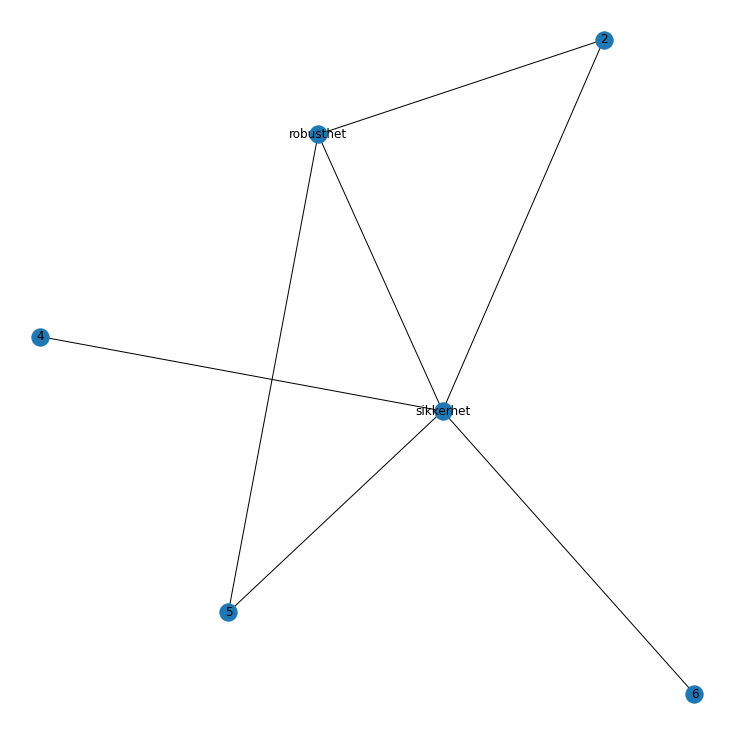

In [14]:
graf.draw()

['sikkerhet', 2, 'robusthet', 4, 5, 6]


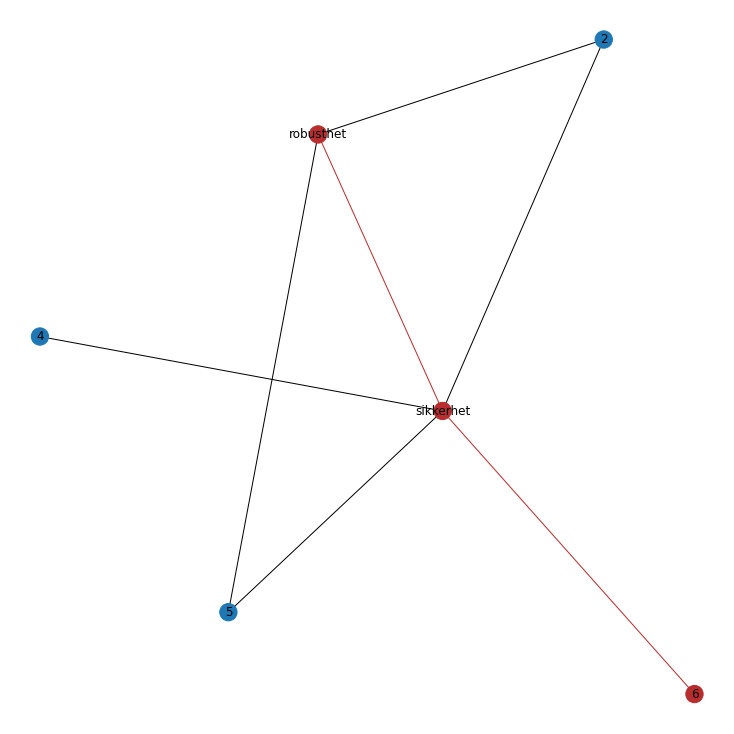

In [15]:
print(graf.nodes)
graf.mark_shortest_path("robusthet", 6)

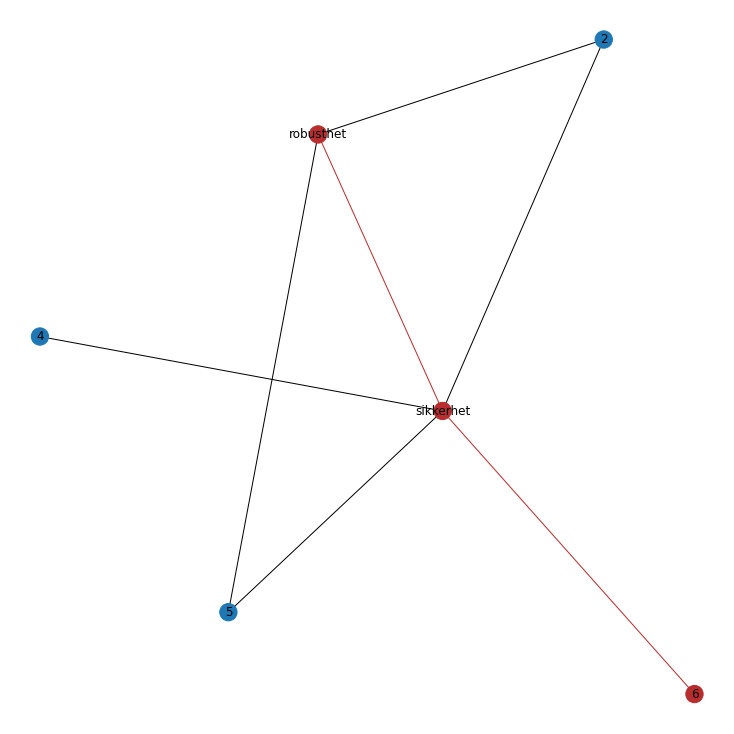

In [16]:
graf.mark_shortest_path("robusthet", 6)

### draw()
##### Parametere
<ul>
    <li><code>node_color</code>: en string eller en liste med strings. Default <code>"#1f78b4"</code>. Dersom en liste blir gitt som argument må den være like lang som <code>number_of_nodes()</code></li>
    <li><code>edge_color</code>: en string eller en liste med strings. Default <code>"k"</code>. Dersom en liste blir gitt som argument må den være like lang som <code>number_of_edges()</code></li>
    <li><code>node_size</code>: en integer. Default <code>300</code></li>
</ul>
Vi kan tegne grafene vi lager. Dette gjøres med metoden <code>draw()</code>. I noen tilfeller kan det være interessant å kunne endre på noen av parametrene (for eksempel hvis man har en veldig stor graf kan det være greit å redusere <code>node_size</code>). <code>node_color</code> og <code>edge_color</code> kan bruke alle <a href=https://matplotlib.org/3.1.0/gallery/color/named_colors.html target="_blank"> matplotlib sine named colors</a>, i tillegg til alle 24 bits hex-verdier for farger. <code>node_size</code> er en integer større enn 0. Her kommer noen eksempler på bruk.

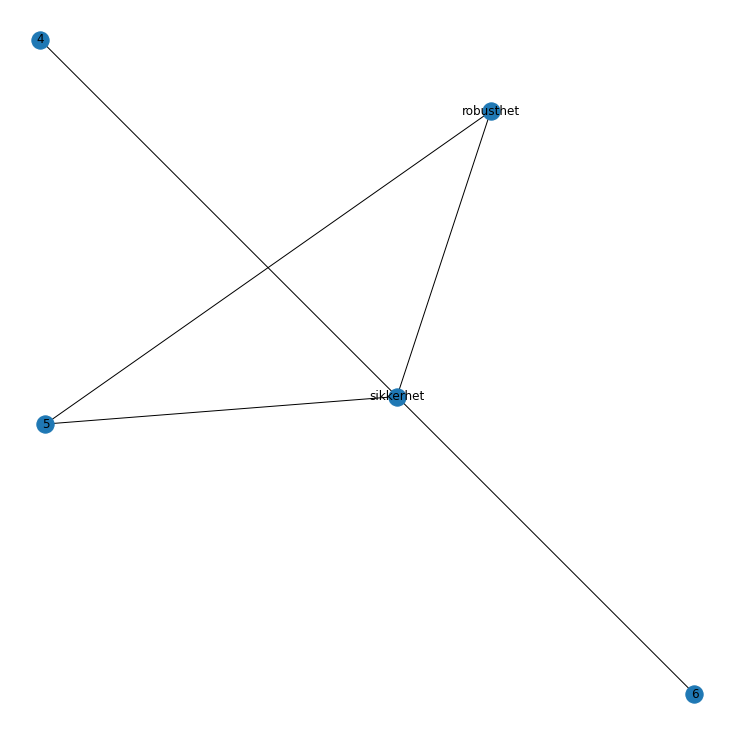

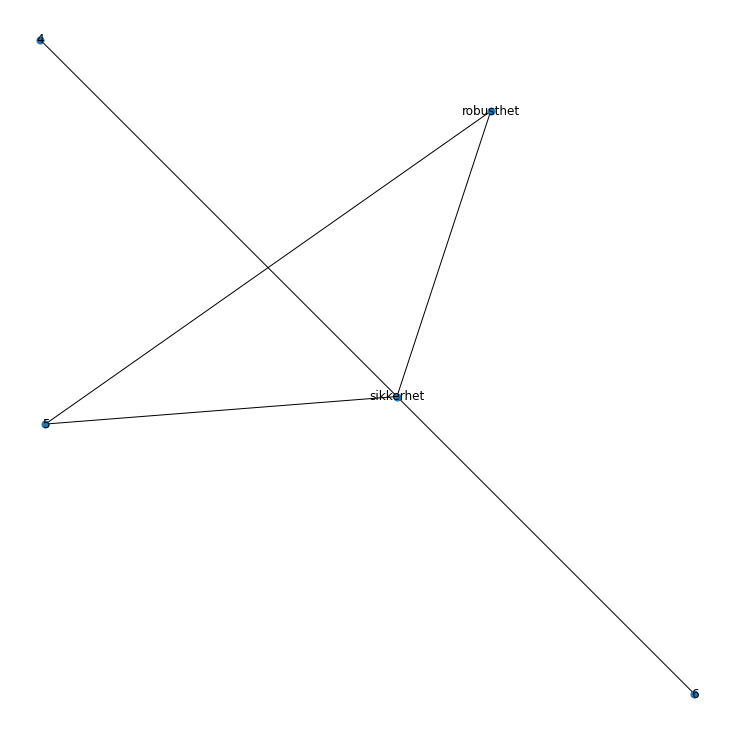

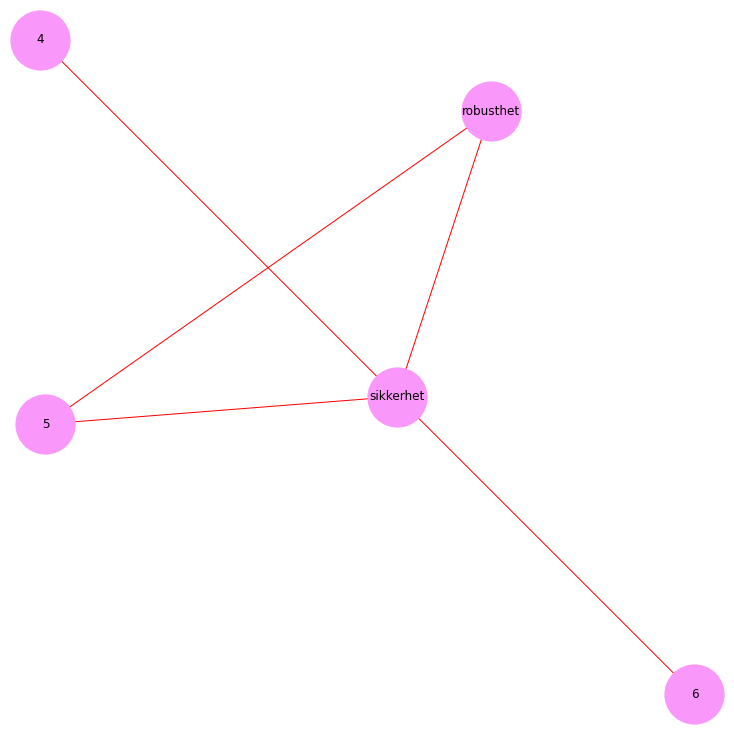

In [66]:
graf.draw()
graf.draw(node_size=50)
graf.draw(node_color="#FA97FA", node_size=3500, edge_color="red")

### get_shortest_path()
##### Parametere
<ul>
    <li>node1: nodeID for startnoden i shortest path søket.</li>
    <li>node2: nodeID for sluttnoden i shortest path søket.</li>
</ul>
Mange ganger kan det være interessant å finne korteste vei mellom to noder dette kan vi gjøre ved å bruke metoden <code>get_shortest_path()</code>. Den returnerer en liste med nodene som inngår i den korteste veien mellom start- og sluttnode. 

In [18]:
shortest = graf.get_shortest_path(6, 2)
print(shortest)

F = Graph()
F.add_nodes_from([1, 2])
print(F.get_shortest_path(1, 2))  # Vil gi None siden vi ikke har noen edges

[6, 'sikkerhet', 2]
None


### mark_shortest_path()
##### Parametere
<ul>
    <li>node1: nodeID for startnoden i shortest path søket.</li>
    <li>node2: nodeID for sluttnoden i shortest path søket.</li>
</ul>
Denne metoden fungerer veldig likt som <code>get_shortest_path()</code>, men i stedet for å returnere shortest path tegner den grafen med shortest path markert. 

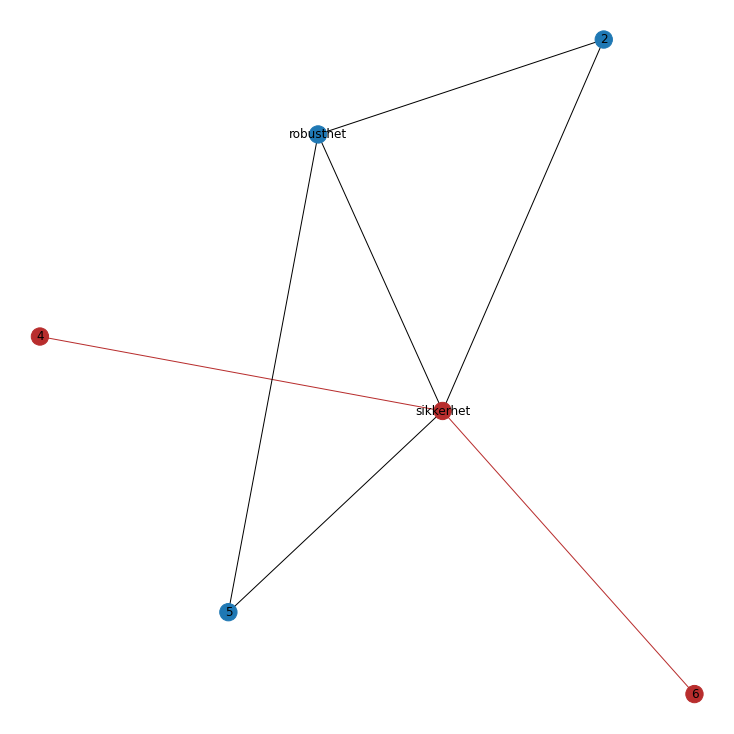

In [19]:
graf.mark_shortest_path(6, 4)

### mark_nodes()
##### Parametere
<ul>
    <li>mark_nodes: en liste med nodeID-er som skal markeres.</li>
</ul>
Dersom det er ønskelig å markere visse noder i en graf kan dette gjøres med metoden <code>mark_nodes()</code>. 

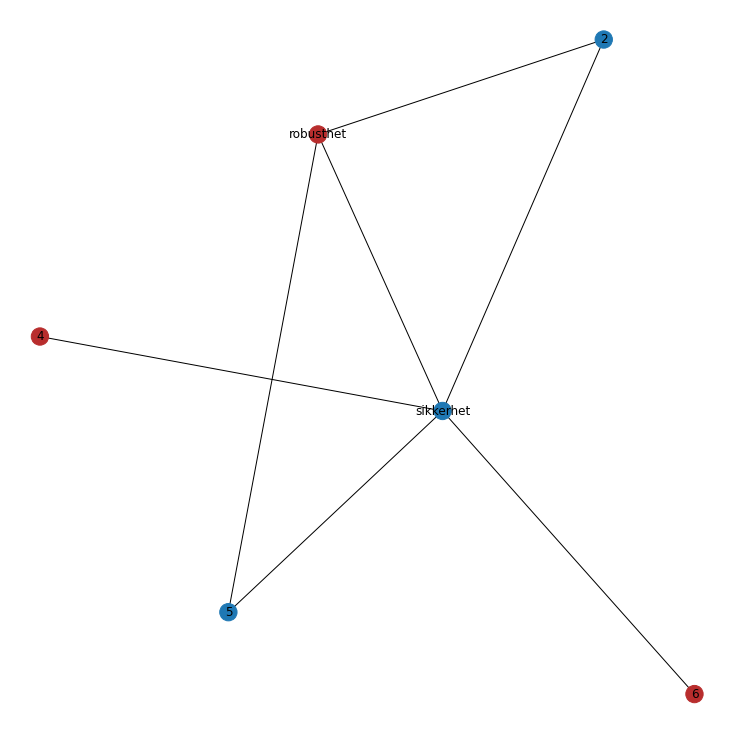

In [20]:
graf.mark_nodes(["robusthet", 4, 6])

### degree_centrality()
For å finne degree centrality for hver node kan man bruke metoden <code>degree_centrality()</code>. Den returnerer en <code>dict</code> med nodeID som keys og degree centrality som values.

In [21]:
print(graf.degree_centrality())

# Eventuelt for å printe pent
print()
print("ID".ljust(15), "Degree")
for node, degree in graf.degree_centrality().items():
    print(f"Node {node}".ljust(15), degree)

{'sikkerhet': 1.0, 2: 0.4, 'robusthet': 0.6000000000000001, 4: 0.2, 5: 0.4, 6: 0.2}

ID              Degree
Node sikkerhet  1.0
Node 2          0.4
Node robusthet  0.6000000000000001
Node 4          0.2
Node 5          0.4
Node 6          0.2


### draw_degree_centrality()
##### Parametere
<ul>
    <li>avg_size: en float som representerer gjennomsnittlig nodestørrelse. Default 300</li>
</ul>
Noen ganger kan det være interessant å tegne grafen der nodene har størrelser som tilsvarer degree centrality. Her kan det være man må prøve seg litt frem med argumenter for avg_size for å få en graf som ikke får for store eller for små noder til at det blir vanskelig å lese.

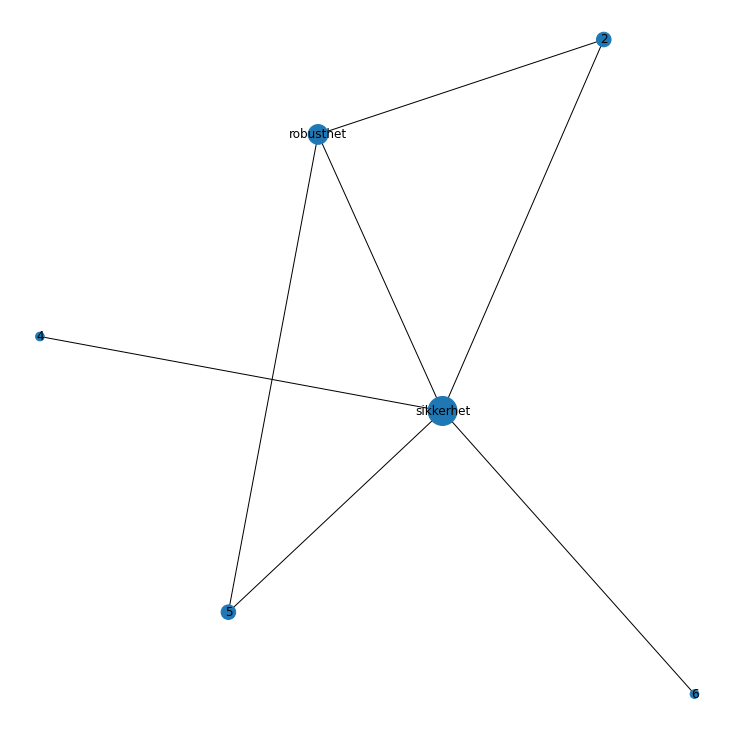

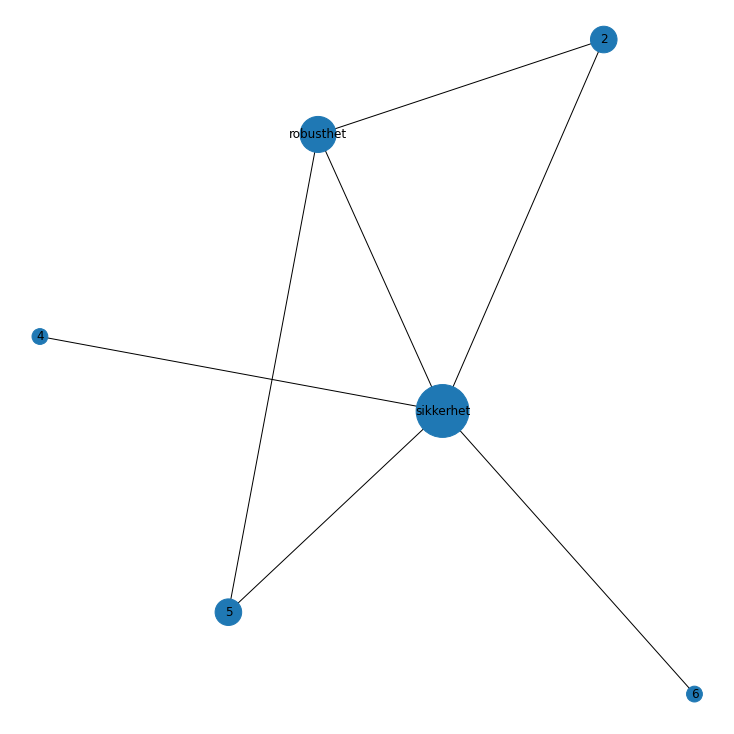

In [22]:
graf.draw_degree_centrality()
graf.draw_degree_centrality(avg_size=1000)

### closeness_centrality()
På samme måte som med <code>degree_centrality()</code> returnerer denne metoden også en <code>dict</code> med nodeID som key og closeness centrality som values. 

In [23]:
print(graf.closeness_centrality())

# Eventuelt for å printe pent
print()
print("ID".ljust(15), "Closeness")
for node, closeness in graf.closeness_centrality().items():
    print(f"Node {node}".ljust(15), closeness)

{'sikkerhet': 1.0, 2: 0.625, 'robusthet': 0.7142857142857143, 4: 0.5555555555555556, 5: 0.625, 6: 0.5555555555555556}

ID              Closeness
Node sikkerhet  1.0
Node 2          0.625
Node robusthet  0.7142857142857143
Node 4          0.5555555555555556
Node 5          0.625
Node 6          0.5555555555555556


### draw_closeness_centrality()
##### Parametere
<ul>
    <li>avg_size: en float som representerer gjennomsnittlig nodestørrelse. Default 300</li>
</ul>
Akkurat på samme måte som med <code>degree_centrality()</code> kan vi her også tegne grafen med ulike nodestørrelser basert på closeness centrality.

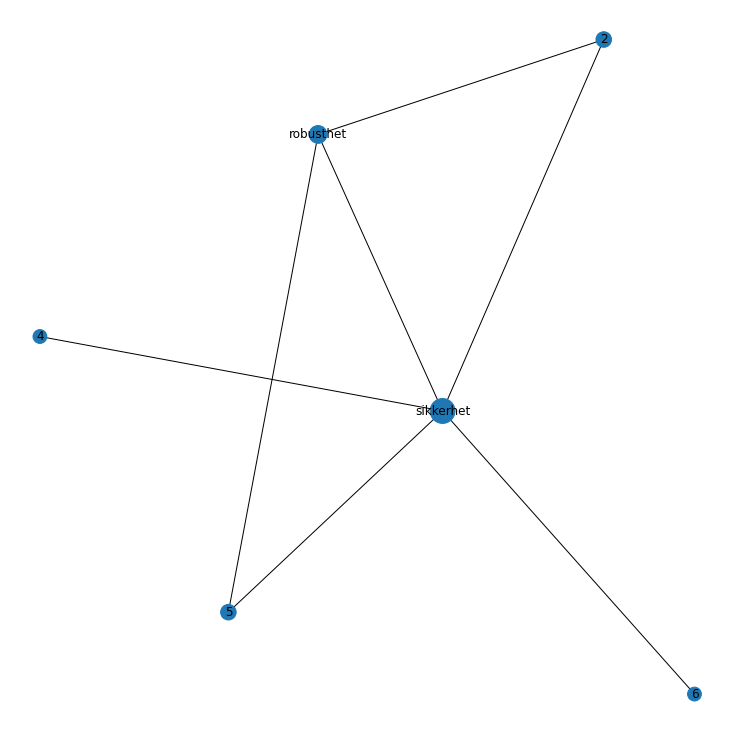

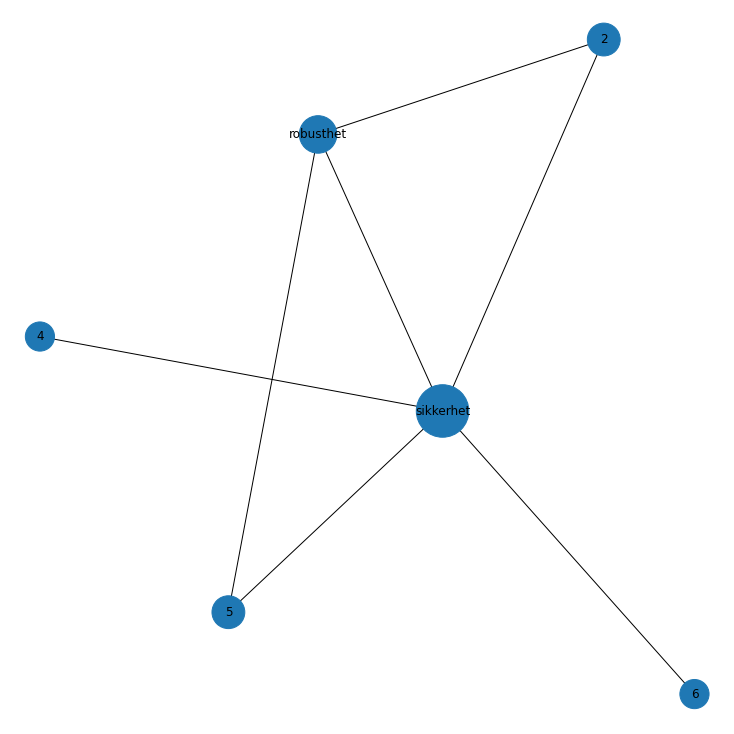

In [24]:
graf.draw_closeness_centrality()
graf.draw_closeness_centrality(1337)

### betweenness_centrality()
På samme som de to andre centrality indeksene kan vi også finne betweenness centrality.

In [25]:
print(graf.betweenness_centrality())

# Eventuelt for å printe pent
print()
print("ID".ljust(15), "Betweenness")
for node, betweenness in graf.betweenness_centrality().items():
    print(f"Node {node}".ljust(15), betweenness)

{'sikkerhet': 0.75, 2: 0.0, 'robusthet': 0.05, 4: 0.0, 5: 0.0, 6: 0.0}

ID              Betweenness
Node sikkerhet  0.75
Node 2          0.0
Node robusthet  0.05
Node 4          0.0
Node 5          0.0
Node 6          0.0


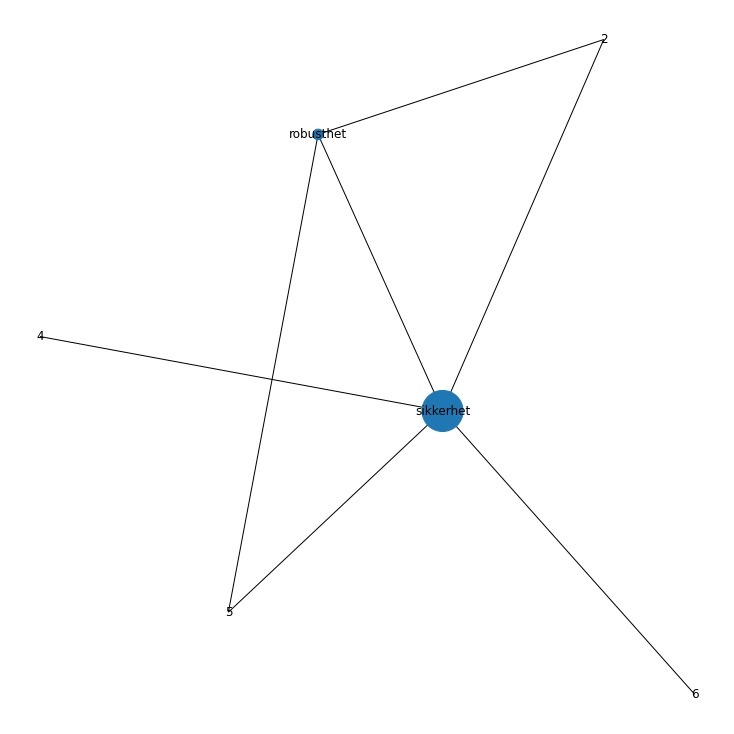

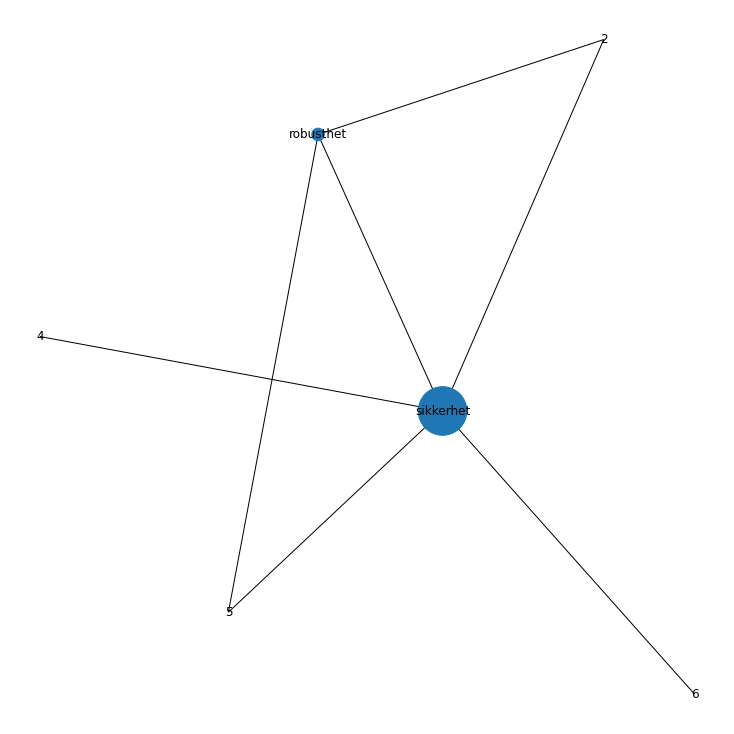

In [26]:
graf.draw_betweenness_centrality()
graf.draw_betweenness_centrality(420)

### Histogram
For å analysere en graf er hisogram over degree distribution ofte veldig hjelpsom. Vi kan plotte et histogram for degree distribution ved å bruke metoden <code>histogram()</code>. Denne metoden returnerer også en liste der hver indeks i listen representerer node degree og hvert element i listen representerer antall noder med respektiv node degree. Siden metoden returnerer noe vil outputen automatisk bli printet når man kaller funksjonen. For å forhindre dette kan vi bruke <code>;</code> for å suppresse outputen.

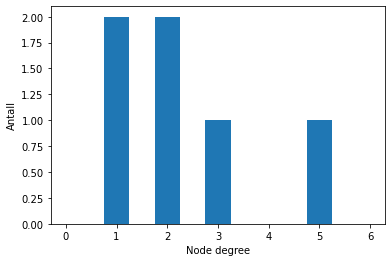

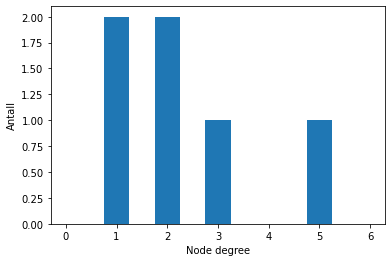

[0, 2, 2, 1, 0, 1]

In [27]:
graf.histogram();  # Printer ikke listen som representerer histogrammet
graf.histogram()  # Printer automatisk listen som representerer histogrammet

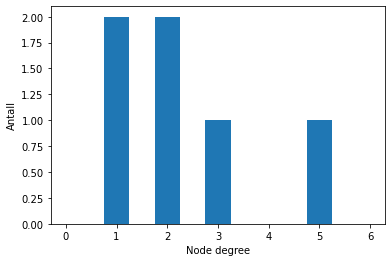

Dette blir printet fra print-funksjonen:
[0, 2, 2, 1, 0, 1]


In [28]:
representasjon = graf.histogram() # Printer ikke listen som representerer histogrammet fordi outputen blir fanget opp i en variabel
print("Dette blir printet fra print-funksjonen:", representasjon, sep="\n")

### get_largest_components_size()
Det kan noen ganger være interessant å vite antall noder i den største sammenhengende komponenten til en graf. Dette kan gjøres med metoden <code>get_largest_components_size()</code>. Merk at denne funksjonen har ganske dårlig kjøretid så den kan ta relativt lang tid dersom den kalles på store grafer. 

In [29]:
print(graf.get_largest_components_size())

6


### remove_node()
##### Parametere
<ul>
    <li>n: ID på noden som skal fjernes.</li>
</ul>
Hvis man ønsker å fjerne en node kan man gjøre det med metoden <code>remove_node()</code>. 

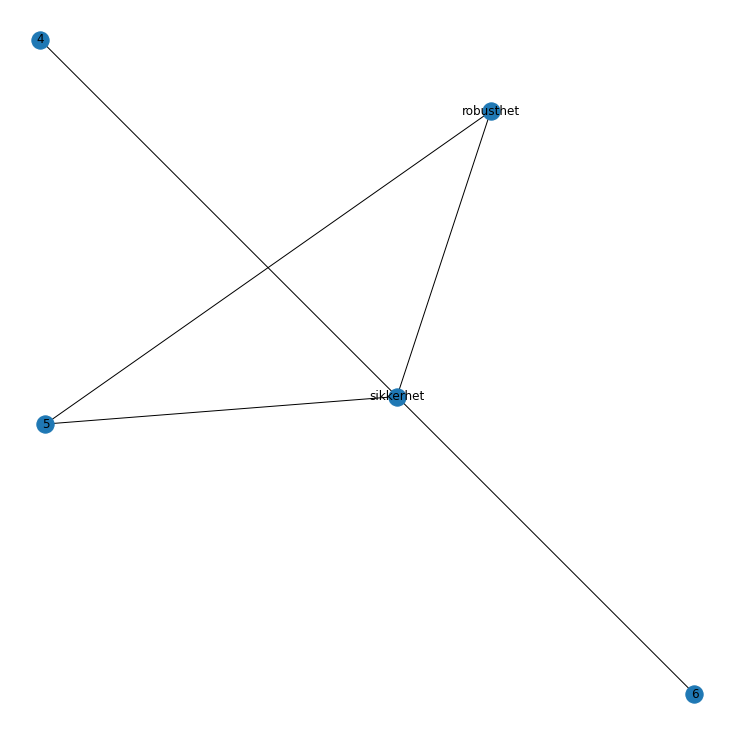

In [30]:
graf.remove_node(2)
graf.draw()

### delete_nodes_attack()
##### Parametere
<ul>
    <li>n: Antall noder som skal slettes.</li>
    <li>centrality_index: En string som bestemmer hvilken centrality index som skal ligge til grunn når vi skal finne "viktigste" node. Gyldige verdier er <code>"degree"</code>, <code>"closeness"</code> og <code>"betweenness"</code>.</li>
    <li>print_result: En <code>bool</code> som bestemmer om metoden skal printe hvilken node den sletter.</li>
</ul>
I løpet av øvingen ønsker vi å simulere forskjellige angrep på nettverkene vi kommer til å lage. Metoden <code>delete_nodes_attack()</code> lar oss angripe n antall noder med de n høyeste verdiene av variabelen centrality_index. Metoden returnerer en kopi av grafen som kaller på den, slik at den originale grafen mister ikke noder slik som med <code>remove_node()</code>. 

Removed node sikkerhet using degree_centrality
Removed node robusthet using degree_centrality
Removed node 4 using degree_centrality


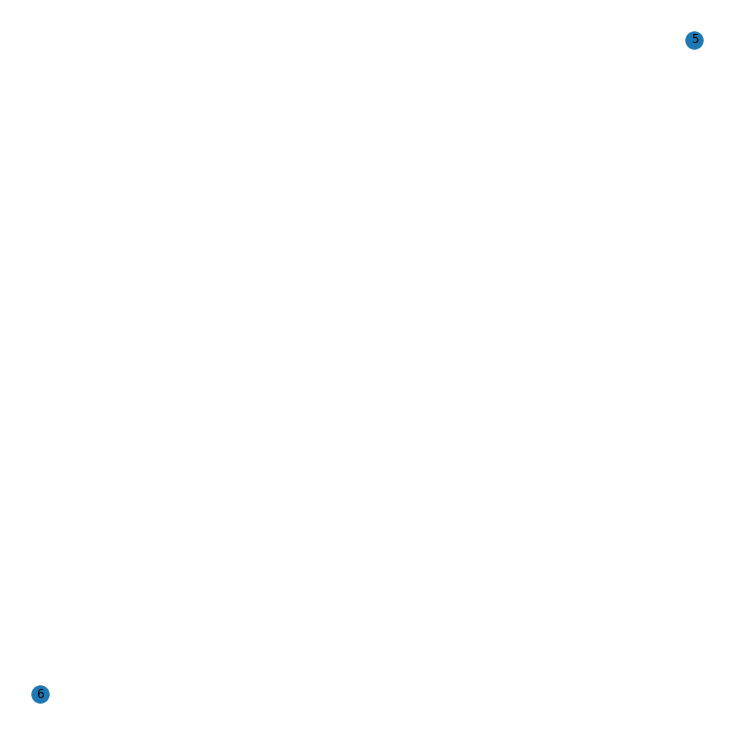

In [31]:
ny_graf1 = graf.delete_nodes_attack(n=3, centrality_index="degree", print_result=True)
ny_graf1.draw()

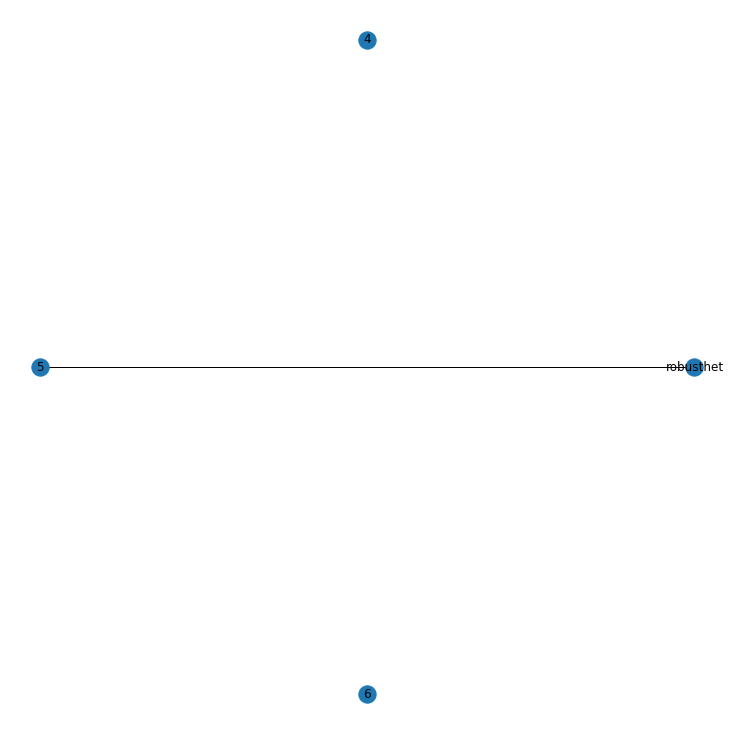

In [32]:
ny_graf2 = graf.delete_nodes_attack(n=1, centrality_index="closeness", print_result=False)
ny_graf2.draw()

### delete_random_nodes()
##### Parametere
<ul>
    <li>n: Antall noder som skal slettes.</li>
    <li>print_result: En <code>bool</code> som bestemmer om metoden skal printe hvilken node den sletter.</li>
</ul>
I nettverk i virkeligheten kan det skje tilfeldige feil med noder slik at de blir borte fra nettverket. Metoden <code>delete_random_nodes()</code> lar oss simulere dette. Den sletter n antall noder der den velger tilfeldige noder. (Den vil ikke slette ved å bruke "ekte" tilfeldighet. Den bruker en "seeded random". Mer om det kommer litt lenger ned). På samme måte som med <code>delete_nodes_attack()</code> returnerer også <code>delete_random_nodes()</code> av grafen som kaller på den.

Removed node robusthet using random_fault
5
Removed node robusthet using random_fault
Removed node 6 using random_fault
Removed node 5 using random_fault


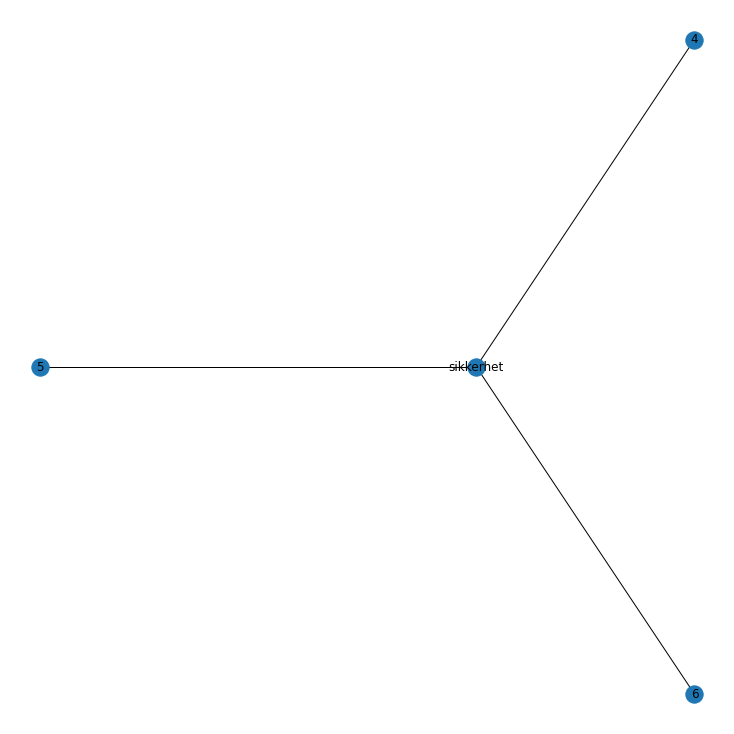

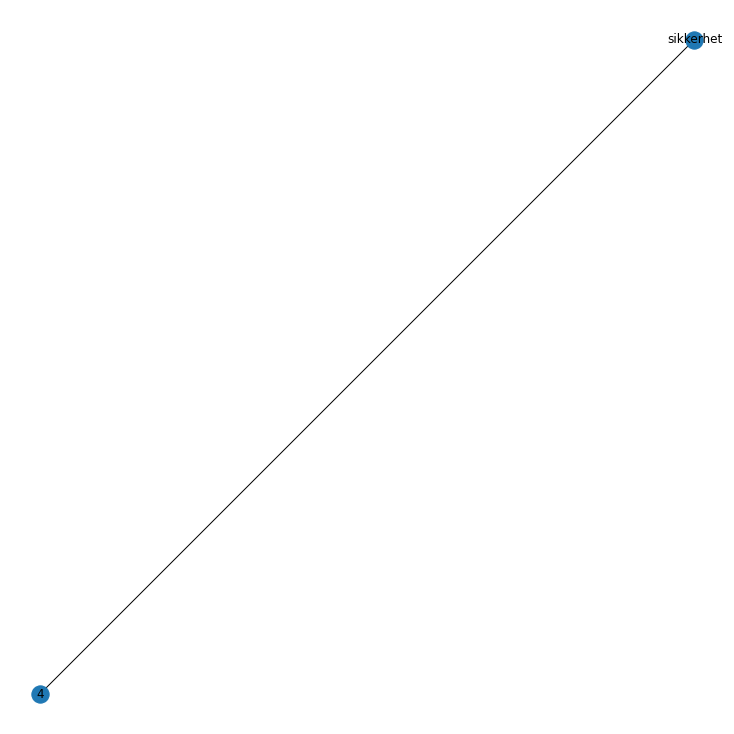

In [33]:
ny_graf_1 = graf.delete_random_nodes(1, print_result=True)
ny_graf_1.draw()
print(graf.number_of_nodes())  # Dette vil fortsatt være 5 selv om vi "sletter" en node

ny_graf_2 = graf.delete_random_nodes(3, print_result=True)
ny_graf_2.draw()

## Litt om random og seeds
Som nevnt i seksjonen om <code>delete_random_nodes()</code> bruker vi en seeded random for å utføre metoder som har med tilfeldighet å gjøre. Alle graf-objektene har en innebygd seed som blir brukt i alle metodene som bygger på tilfeldighet. Dette fører til at når et graf-objekt er instansiert vil random-metodene ha samme oppførsel selv om de blir kalt på flere ganger etter hverandre. Koden under demonstrerer hvordan seeded random fungerer. Vi får den samme sekvensen hver gang vi kaller på <code>random.randint()</code>.

In [34]:
import random

seed = 198
for i in range(5):
    random.seed(seed)
    print(f"{i + 1}. iterasjon: ")
    for j in range(i + 1):
        print(f"{j + 1}. random gir", random.randint(42, 420))
    print()


1. iterasjon: 
1. random gir 69

2. iterasjon: 
1. random gir 69
2. random gir 335

3. iterasjon: 
1. random gir 69
2. random gir 335
3. random gir 406

4. iterasjon: 
1. random gir 69
2. random gir 335
3. random gir 406
4. random gir 288

5. iterasjon: 
1. random gir 69
2. random gir 335
3. random gir 406
4. random gir 288
5. random gir 93



På samme måte vil <code>delete_random_nodes()</code> alltid slette samme sekvensen med noder. Hvis vi hadde instansierert et nytt graf-objekt ville vi fått en ny seed og en ny "tilfeldig" sekvens med noder som slettes.

In [35]:
ny1 = graf.delete_random_nodes(2, print_result=True)
ny2 = graf.delete_random_nodes(2, print_result=True)

Removed node robusthet using random_fault
Removed node 6 using random_fault
Removed node robusthet using random_fault
Removed node 6 using random_fault


## BussGraph
##### Parametere
<ul>
    <li>n: Antall noder i nettverket.</li>
</ul>
En <code>BussGraph</code> har ingen egne metoder, men arver alle metodene som ble beskrevet under seksjonen til <code>Graph</code>. Spesielt for en Buss graf er at alle noder kun er tilknyttet to andre noder.

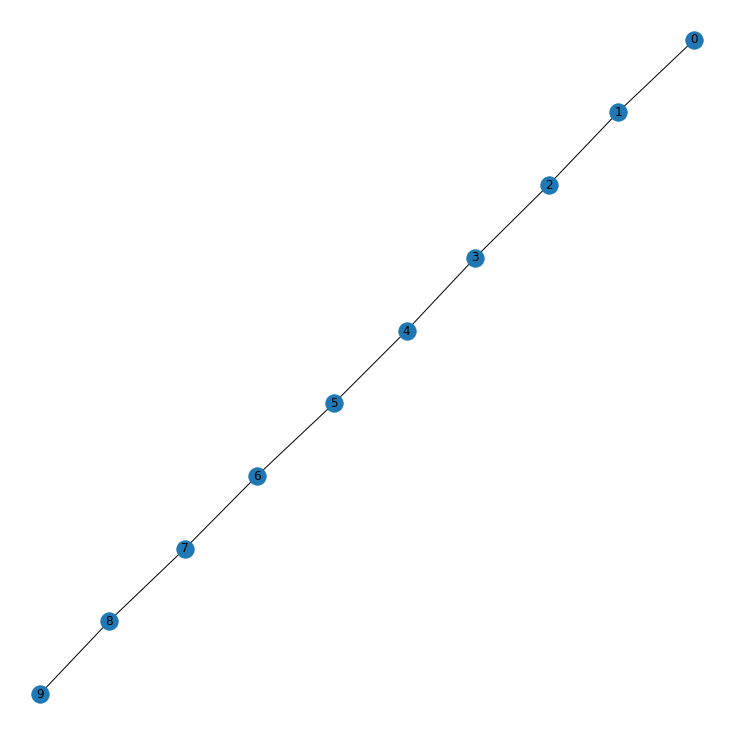

In [36]:
buss = BussGraph(10)
buss.draw()

## TreeGraph
##### Parametere
<ul>
    <li>splits: Antall kanter per node i foreldrenode nettverket.</li>
    <li>height: Dybden i nettverket.</li>
</ul>
En <code>TreeGraph</code> har ingen egne metoder, men arver alle metodene som ble beskrevet under seksjonen til <code>Graph</code>. Spesielt for en Tree graf er at en treegraf er en asyklisk enkel graf.

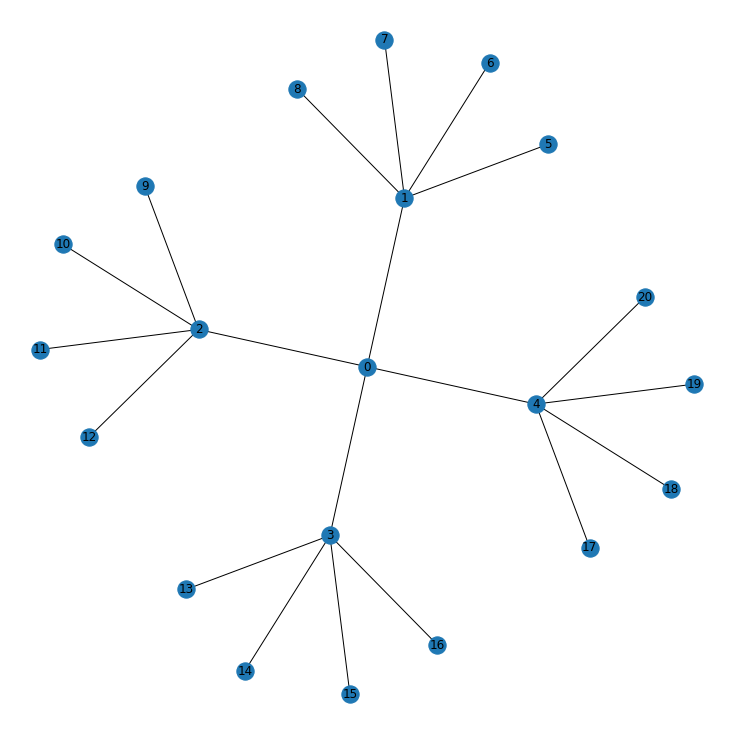

In [37]:
tree = TreeGraph(4,2)
tree.draw()

## RingGraph
##### Parametere
<ul>
     <li>n: Antall noder i nettverket.</li>
</ul>
En <code>RingGraph</code> har ingen egne metoder, men arver alle metodene som ble beskrevet under seksjonen til <code>Graph</code>. Spesielt for en Ring graf er at hver node har to kanter.

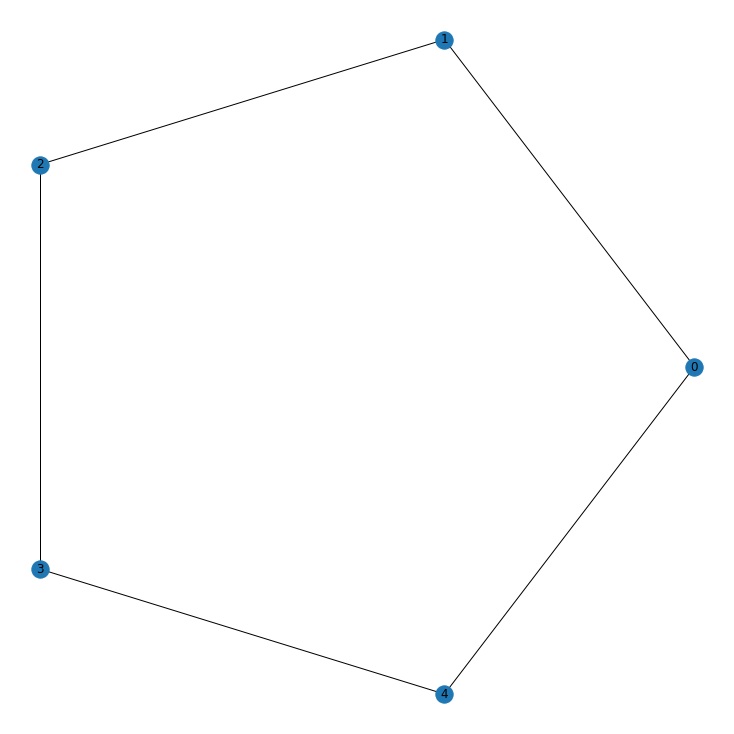

In [38]:
ring = RingGraph(5)
ring.draw()

## StarGraph
##### Parametere
<ul>
     <li>n: Antall løvnoder i nettverket.</li>
</ul>
En <code>StarGraph</code> har ingen egne metoder, men arver alle metodene som ble beskrevet under seksjonen til <code>Graph</code>. <br/>
En stjerne har en node i midten og resten løvnoder.

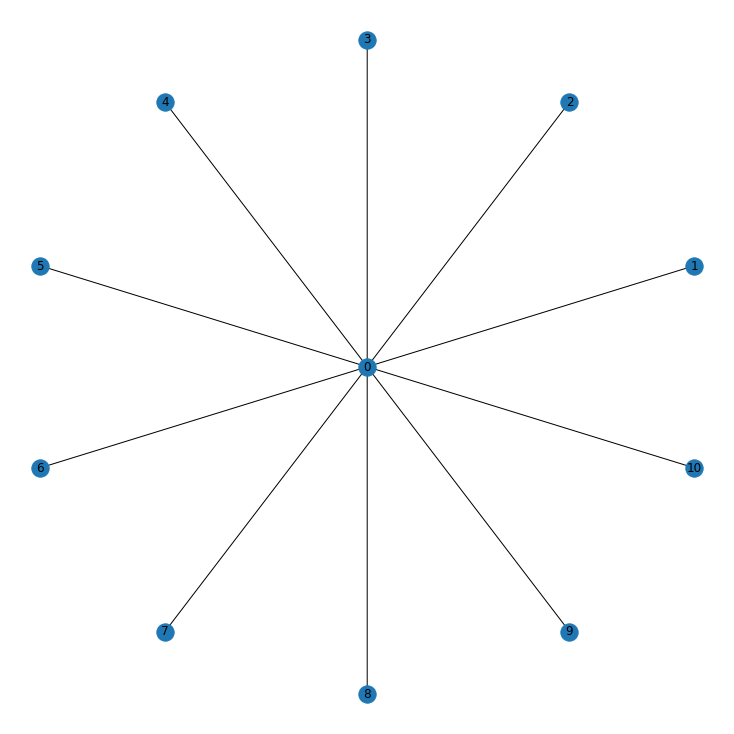

In [39]:
star = StarGraph(10)
star.draw()

## GridGraph
##### Parametere
<ul>
    <li>height: Antall noder i høyden i nettverket.</li>
    <li>width: Antall noder i bredden i nettverket.</li>
</ul>
En <code>GridGraph</code> har ingen egne metoder, men arver alle metodene som ble beskrevet under seksjonen til <code>Graph</code>.

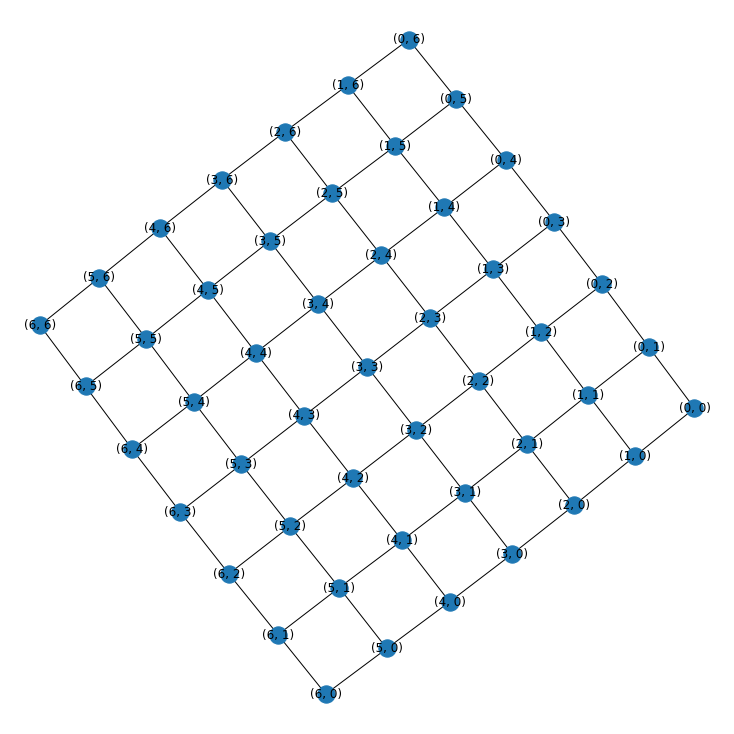

In [40]:
grid = GridGraph(7, 7)
grid.draw()

## MeshGraph
##### Parametere
<ul>
    <li>n: Antall noder i nettverket.</li>
</ul>
En <code>MeshGraph</code> har ingen egne metoder, men arver alle metodene som ble beskrevet under seksjonen til <code>Graph</code>. Spesielt for en Mesh graf er at alle noder er tilknyttet alle andre noder.

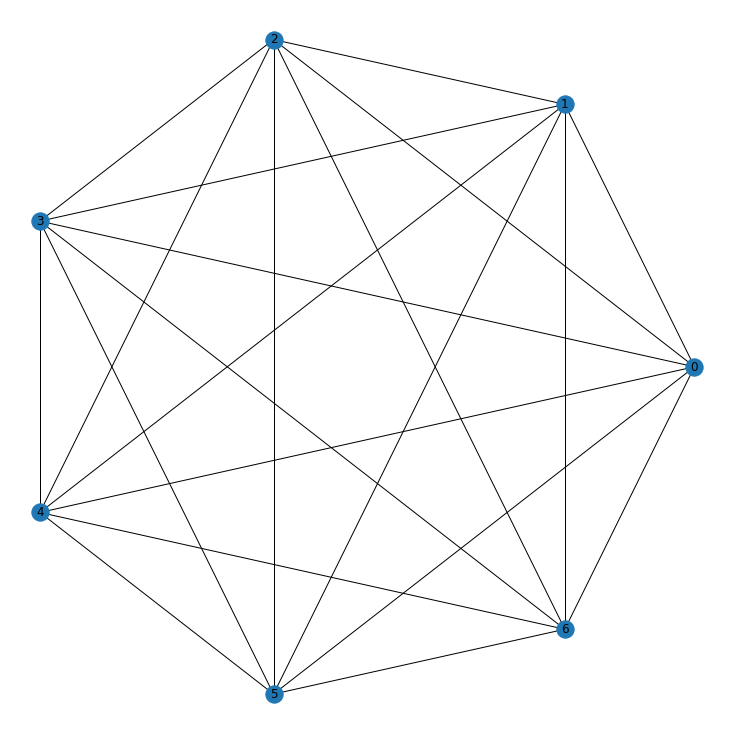

In [41]:
mesh = MeshGraph(7)
mesh.draw()

## ConstructedGraph
##### Parametere
<ul>
    <li>expanded: En <code>bool</code> som bestemmer om grafen skal være en større, utvidet versjon eller ikke. Default er True.</li>
</ul>
<code>ConstructedGraph</code> er en klasse som lager et ferdig nettverk bestående av et kjernenettverk, 4 transportnett og aksessnett langs transportnettene. Objektene kommer i to forskjellige versjoner, expanded eller ikke. 

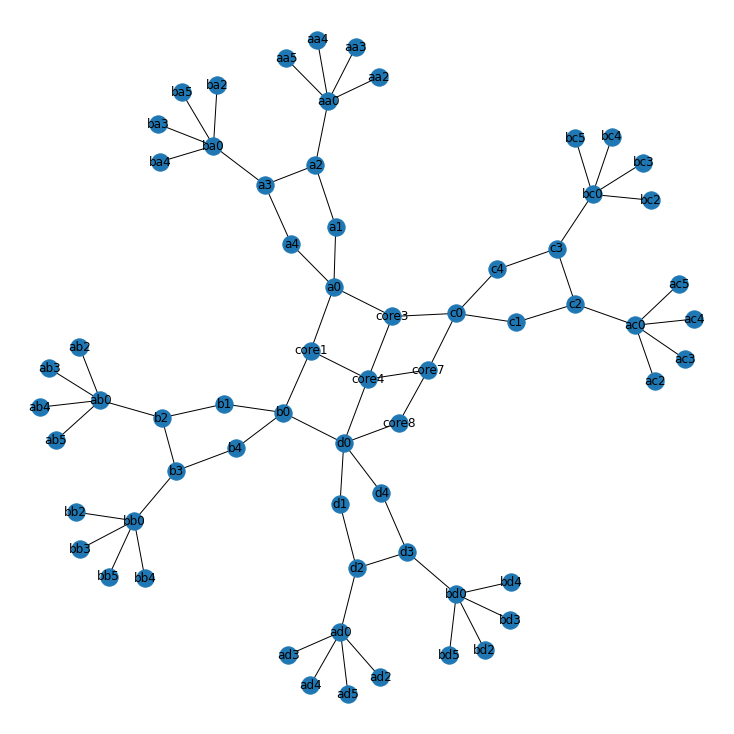

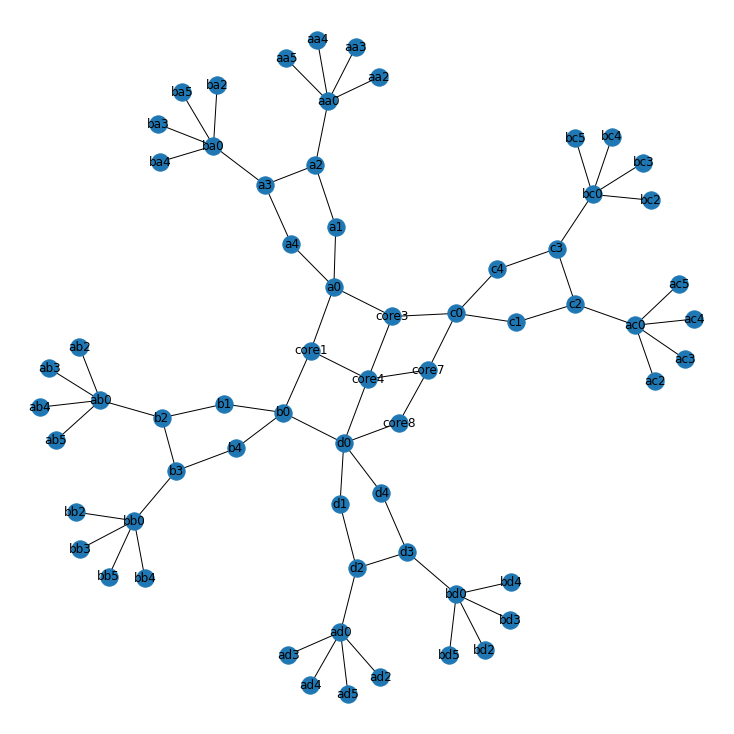

In [42]:
const_vanlig = ConstructedGraph(expanded=False)
const_expanded = ConstructedGraph()
const_vanlig.draw()
const_expanded.draw()

## WattsStrogatz
##### Parametere
<ul>
    <li>n: Antall noder i grafen.</li>
    <li>k: Antall nabonoder som hver node skal ha kanter til. Den blir automatisk k-1 dersom k er et oddetall.</li>
    <li>p: Sannsynligheten for at en kant (u, v) skal bli byttet ut med en annen kant (u, w).</li>
</ul>
En Watts-Strogatz graf lages ved å først lage en ringstruktur med n noder. Deretter vil hver node få en kant til sine k nærmeste noder (k - 1 nærmeste dersom k er et oddetall). Til slutt vil hver kant (u, v), som går fra node u til node v, bli byttet ut med en annen kant (u, w) med sannsynlighet p. w er en node som blir valgt med uniform sannsynlighet fra alle eksisterende noder unntatt node u. Når dere jobber med slike grafer som er generert ved å bruke algoritmer som bruker tilfeldigheter er det lurt å notere seg seeden slik at dere kan lage samme grafen ved et senere tidspunkt. 

Seed for ws1 69


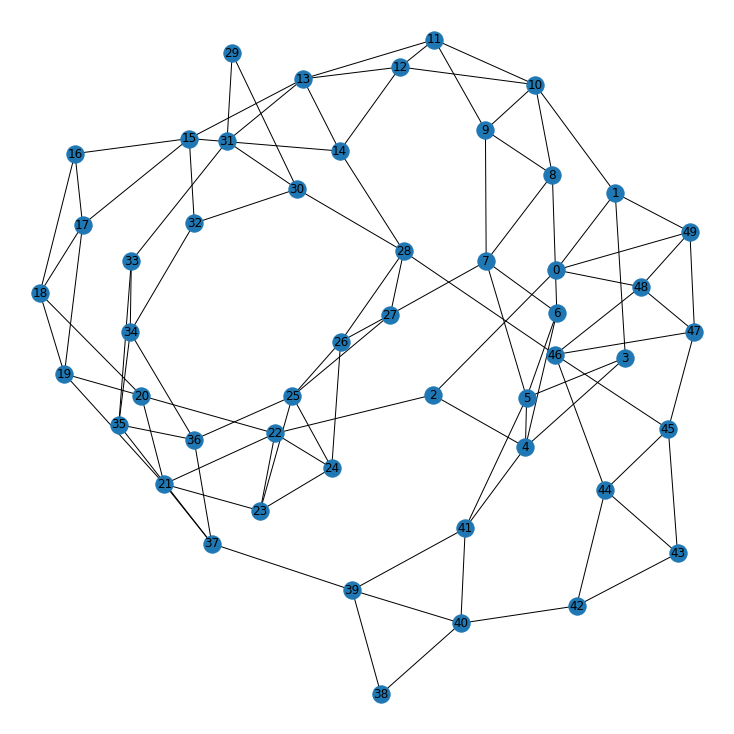

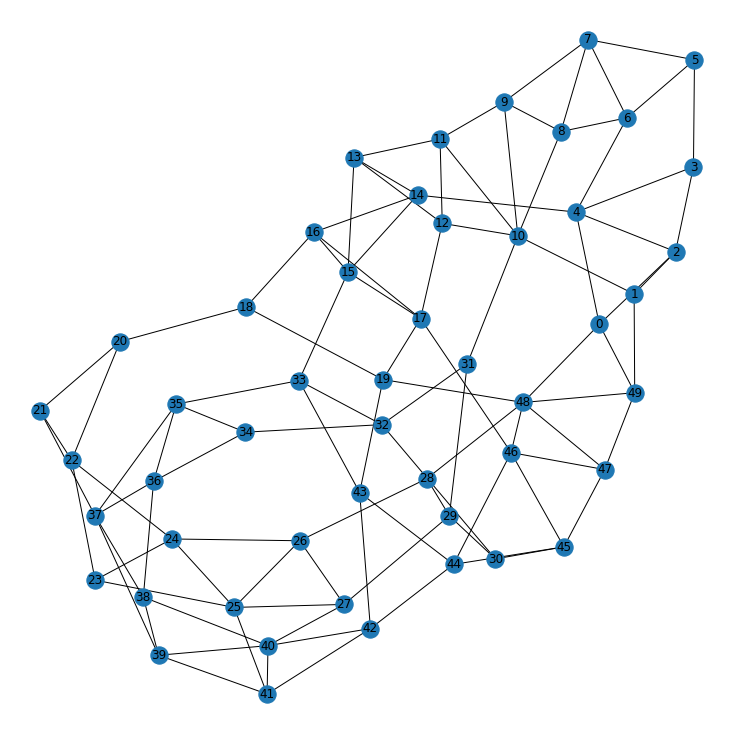

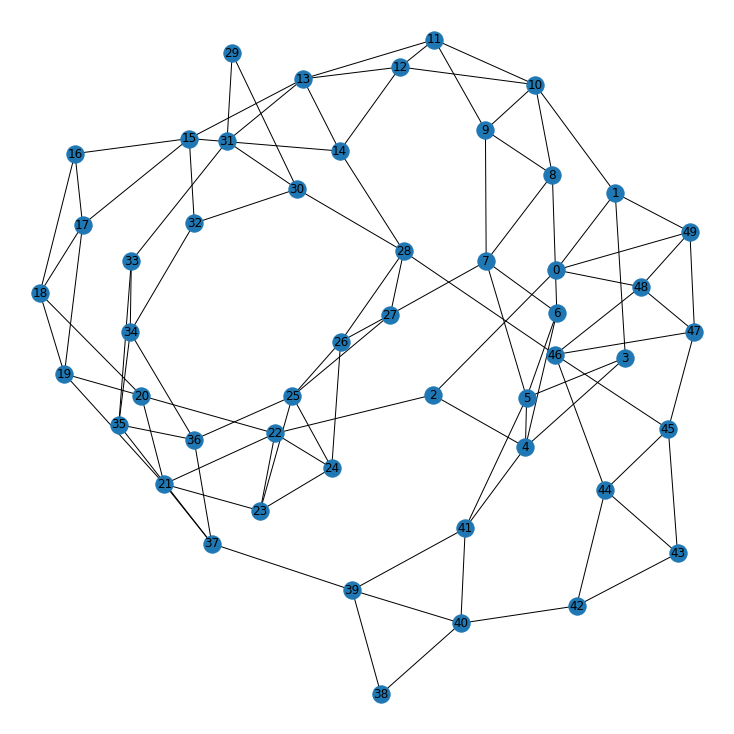

In [43]:
ws1 = WattsStrogatz(n=50, k=4, p=0.1, seed=69)
print("Seed for ws1", ws1.seed)
ws2 = WattsStrogatz(n=50, k=4, p=0.1)
ws3 = WattsStrogatz(n=50, k=4, p=0.1, seed=ws1.seed)  # Setter seed til samme som  ws1 slik at de blir like
ws1.draw()
ws2.draw()
ws3.draw()

## BarabasiAlbert
##### Parametere
<ul>
    <li>n: Antall noder i grafen.</li>
    <li>m: Antall node hver nye node skal koble seg til.</li>
</ul>
En Barabasi-Albert graf lages ved at en og en node legges til grafen helt til det er n noder totalt. Hver node som legges til knytter seg til to andre tilfeldige noder. Sannsynligheten $p_i$ for at den nye noden skal lage en kant til node $i$ er gitt ved formelen:
\begin{equation*}
p_i = \frac{k_i}{\sum_{j}^n k_j}
\end{equation*}

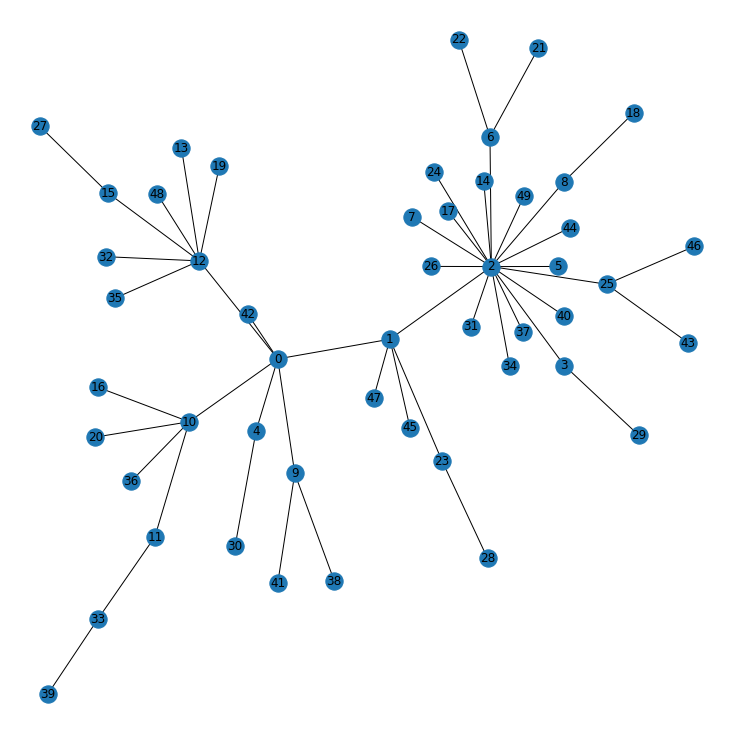

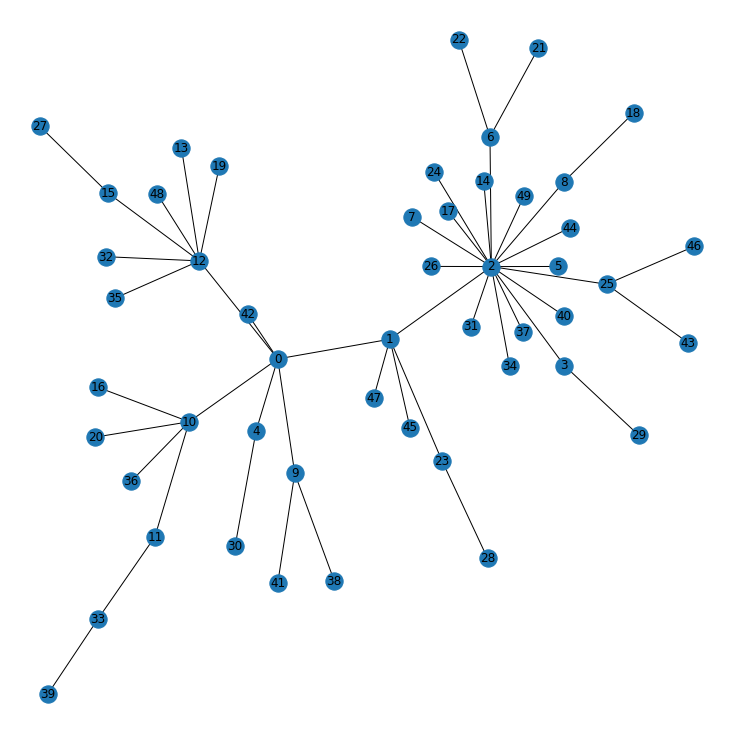

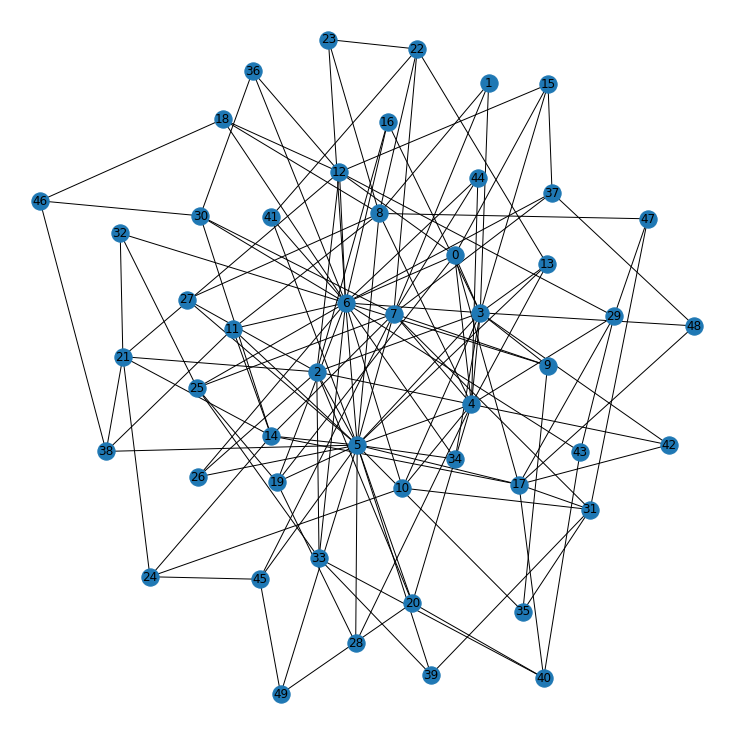

In [44]:
ba1 = BarabasiAlbert(n=50, m=1)
ba2 = BarabasiAlbert(n=50, m=1, seed=ba1.seed)
ba3 = BarabasiAlbert(n=50, m=3)
ba1.draw()
ba2.draw()
ba3.draw()

## RealNetworkGraph
##### Parametere
<ul>
    <li>url: En string med url-en til en graf hos topology-zoo.</li>
</ul>
Denne klassen bruker en url til å laste ned et graphml-dokument og representere det som en graf. For å finne url-en går du først inn på <a href=http://www.topology-zoo.org/dataset.html>http://www.topology-zoo.org/dataset.html</a>. Finn deretter et nettverk du vil laste ned og trykk på GraphML under kolonnen for downloads. Kopier url-en til siden du nå er på. NB: klassen er ikke testet for alle grafer som ligger på siden, så hvis det ikke virker så får du heller prøve et annet nettverk. 

In [45]:
rn = RealNetworkGraph("http://www.topology-zoo.org/files/Garr200908.graphml")

### draw()
##### Parametere
<ul>
    <li>edge_color: Fargen på kantene. Den fungerer akkurat på samme måte som <code>draw()</code>-metoden til <code>Graph</code>. Default er <code>"#b4b4b4"</code>.</li>
    <li>node_color: Fargen på nodene. Gyldig input er samme som for edge_color. Default <code>"k"</code>.</li>
    <li>figsize: En tuppel med høyde og bredde i inches på figuren som grafen skal tegnes i. (Jupyter kan tegne ca 15 x 15 så alt over det vil zoome ut innholdet i figuren i stedet for å øke størrelsen). Default (15, 14).</li>
    <li>with_labels: En <code>bool</code> som bestemmer om navnene på nodene skal tegnes eller ikke. Default True</li>
    <li>font_size: Størrelse på fonten. Default 12</li>
    <li>node_size: Størrelse på nodene. Default 20</li>
    <li>edge_width: Bredden på kantene. Default 0.6</li>
</ul>
Grunnen til at denne <code>draw()</code>-metoden har så mange flere parametre enn den generelle til <code>Graph</code> er at nettverkene fra topologi-zoo kan være svært forskjellige slik at det er ønskelig å justere tegningen deretter.

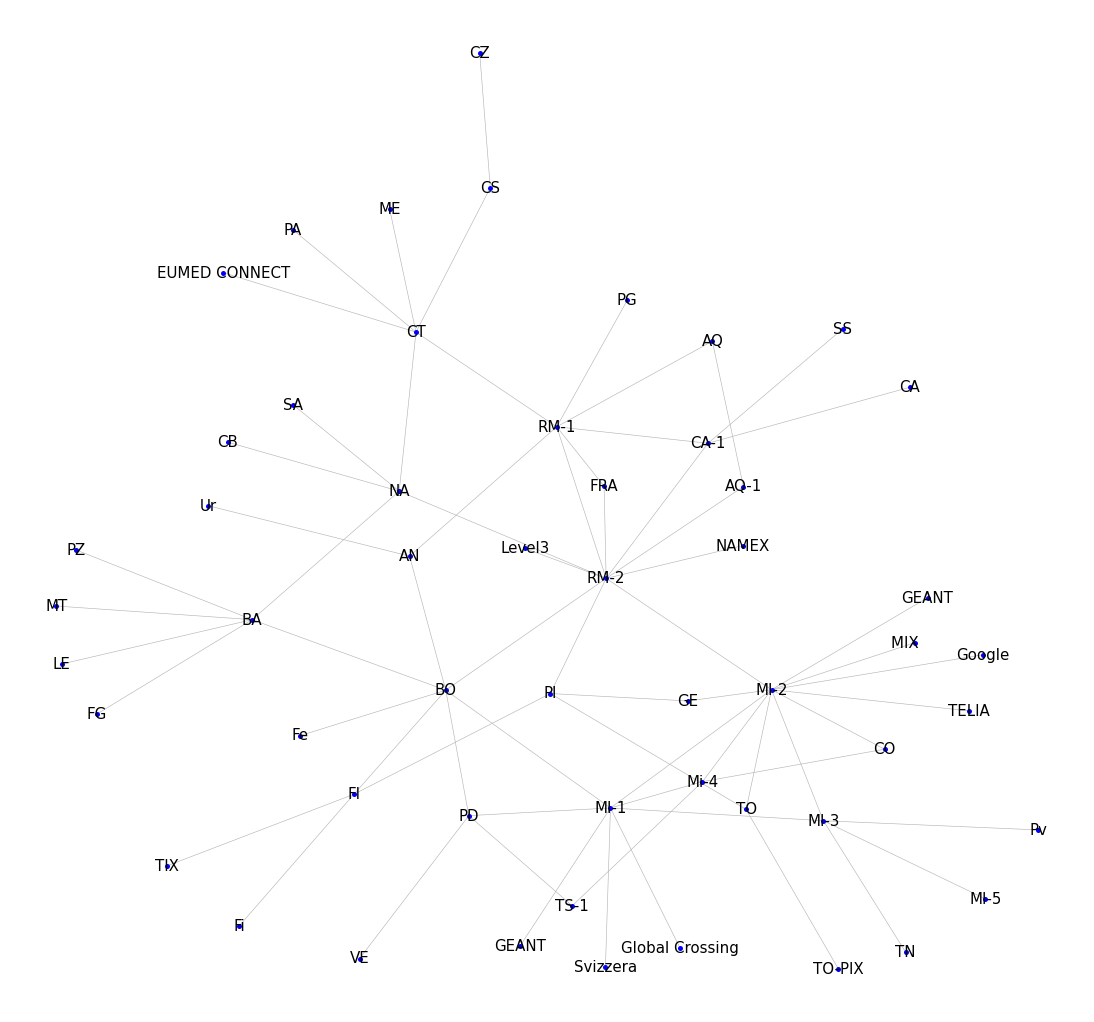

In [46]:
rn.draw(font_size=15, node_size=25, node_color="blue")

## VDESGraph
##### Parametere
<ul>
    <li>boat_count: Hvor mange noder i grafen som skal representere båter. Default 10.</li>
    <li>satellite_count: Hvor mange noder i grafen som skal representere satellitter. Default 2.</li>
    <li>radio_tower_count: Hvor mange noder i grafen som skal representere radiotårn.</li>
</ul>
<code>VDESGraph</code> er knyttet opp mot caset i øvingsopplegget. Med den er det mulig å definere hvor mange båter, satellitter og radiotårn det er ønskelig å ha med i utsnittet av vdes-nettverket.

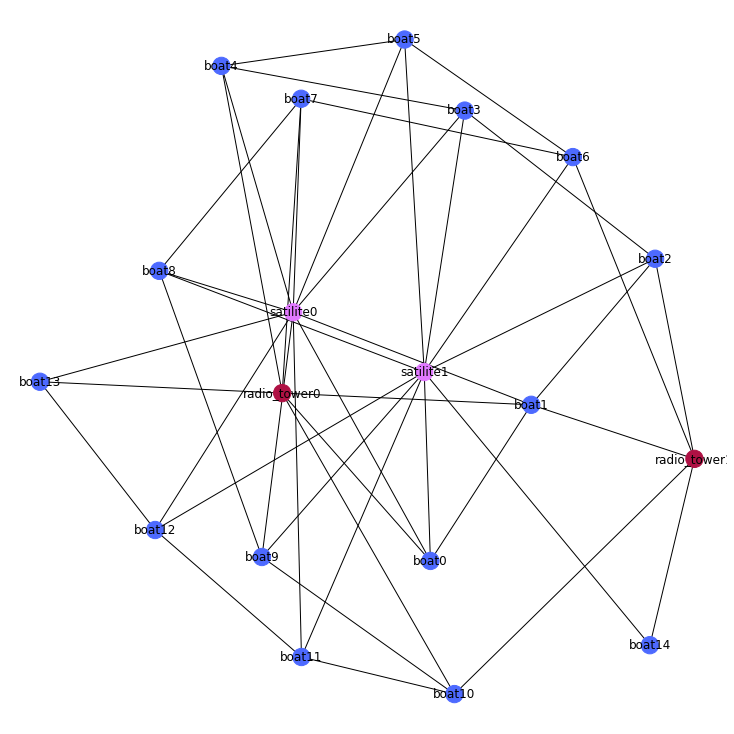

In [47]:
vdes = VDESGraph(boat_count=15, satellite_count=2, radio_tower_count=2)
vdes.draw()

# Eksempeloppgaver hente fra øvingen i fjor
Her følger en kort introduksjonsdel (Del 1) med oppgaver tatt i fra øvingen i fjor.
Etter oppgaven følger et løsningsforslag, husk at flere svar kan være riktige.

# Del 1: Introduksjon
I denne delen skal vi bli kjent med hvordan man plotter grafer.
## Oppgave 1.1
Lag en graf ved å først opprette et objekt av klassen <code>Graph</code>. Legg deretter til 5-10 noder ved å bruke metoden <code>add_node()</code> eller <code>add_nodes_from()</code>. Legg så til kanter mellom de nodene du ønsker ved å bruke <code>add_edge()</code> eller <code>add_edges_from()</code>. Bruk til slutt metoden <code>draw()</code> for å tegne grafen.

In [48]:
# Skriv koden her


## Oppgave 1.2
Man kan finne antall noder ved å bruke metoden <code>number_of_nodes()</code>. Prøv den ut på grafobjektet du opprettet i forrige oppgave og print resultatet.

In [49]:
# Skriv koden her


## Oppgave 1.3
På samme måte som med noder kan man finne antallet kanter i grafen med metoden <code>number_of_edges()</code>. Bruk den på grafen fra oppgave 1.1 til å finne antall kanter i grafen og print resultatet.

In [50]:
# Skriv koden her


## Oppgave 1.4
Opprett et <code>GridGraph</code>-objekt med 5 x 5 noder. Tegn korteste vei mellom node (4, 4) og (1, 2) med metoden <code>mark_shortest_path()</code>.

In [51]:
# Plot grafen her


## Oppgave 1.5
Vi skal forsette å bruke grafen fra forrige oppgave. Fjern node (1, 3) og (2, 2) ved å bruke metoden <code>remove_node()</code>. Finn nå korteste vei mellom node (4, 4) og (1, 2) og tegn resultatet. (Merk at nodene ikke nødvendigvis blir tegnet på samme steder som i forrige oppgave, men den tegner en isomorf graf)

In [52]:
# Skriv koden her


## Oppgave 1.6
Hvor mange noder må minst slettes for at korteste vei mellom node (4, 4) og (1, 2) skal bli lenger enn den var i oppgave 1.5, men at det fremdeles finnes en vei?

In [53]:
# Kodecelle hvis du vil teste

Hvor mange noder må slettes for at det ikke skal eksistere noen vei mellom node (4, 4) og (1, 2), med utgangspunkt i grafen slik den er i oppgave 1.5?

In [54]:
# Kodecelle hvis du vil teste

## Oppgave 1.7
Opprett et <code>WattsStrogatz</code>-objekt med parametre n=100, k=4 og p=0.1.
Tegn så grafen, og finn korteste vei mellom node 53 og 75.


In [55]:
# Skriv koden her


In [56]:
# Skriv koden for korteste vei her


# Del 1: Introduksjon LF
I denne delen skal vi bli kjent med hvordan man plotter grafer.
## Oppgave 1.1
Lag en graf ved å først opprette et objekt av klassen <code>Graph</code>. Legg deretter til 5-10 noder ved å bruke metoden <code>add_node()</code> eller <code>add_nodes_from()</code>. Legg så til kanter mellom de nodene du ønsker ved å bruke <code>add_edge()</code> eller <code>add_edges_from()</code>. Bruk til slutt metoden <code>draw()</code> for å tegne grafen.

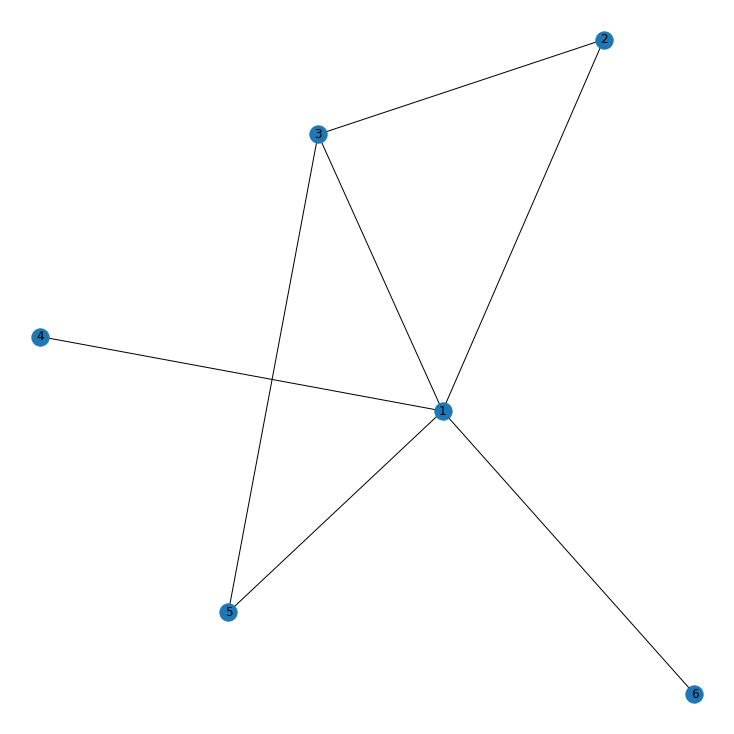

In [57]:
# Skriv koden her

#LF
eksempelgraf = Graph()
eksempelgraf.add_node(1)
eksempelgraf.add_nodes_from([2, 3, 4, 5, 6])
eksempelgraf.add_edge(1, 5)
eksempelgraf.add_edges_from([(1, 3), (1, 2), (5, 3), (3, 2), (1, 4), (1, 6)])
eksempelgraf.draw()

## Oppgave 1.2
Man kan finne antall noder ved å bruke metoden <code>number_of_nodes()</code>. Prøv den ut på grafobjektet du opprettet i forrige oppgave og print resultatet.

In [58]:
# Skriv koden her

#LF
print(eksempelgraf.number_of_nodes())

6


## Oppgave 1.3
På samme måte som med noder kan man finne antallet kanter i grafen med metoden <code>number_of_edges()</code>. Bruk den på grafen fra oppgave 1.1 til å finne antall kanter i grafen og print resultatet.

In [59]:
# Skriv koden her

#LF
print(eksempelgraf.number_of_edges())

7


## Oppgave 1.4
Opprett et <code>GridGraph</code>-objekt med 5 x 5 noder. Tegn korteste vei mellom node (4, 4) og (1, 2) med metoden <code>mark_shortest_path()</code>.

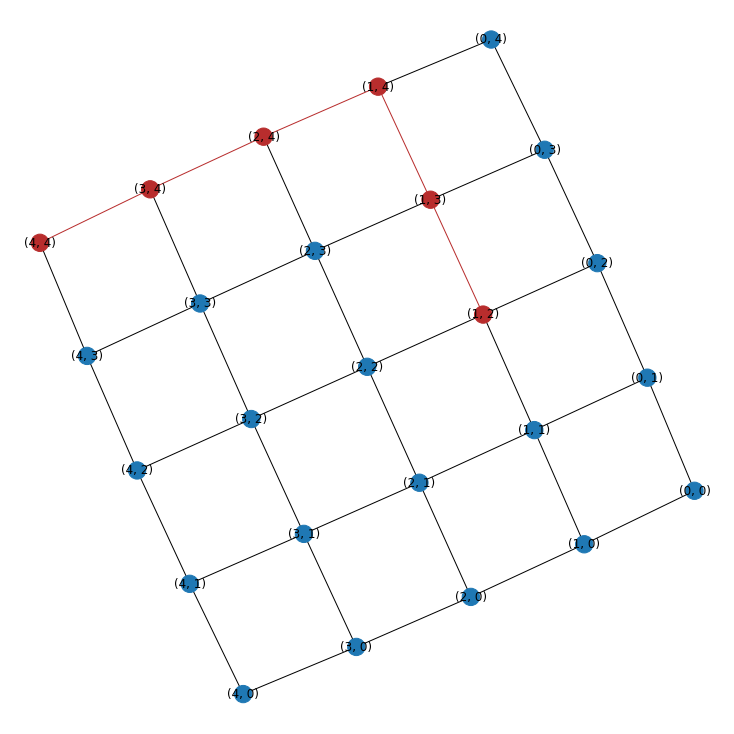

In [60]:
# Plot grafen her

#LF
grid = GridGraph(5, 5)
grid.mark_shortest_path((4, 4), (1, 2))

## Oppgave 1.5
Vi skal forsette å bruke grafen fra forrige oppgave. Fjern node (1, 3) og (2, 2) ved å bruke metoden <code>remove_node()</code>. Finn nå korteste vei mellom node (4, 4) og (1, 2) og tegn resultatet. (Merk at nodene ikke nødvendigvis blir tegnet på samme steder som i forrige oppgave, men den tegner en isomorf graf)

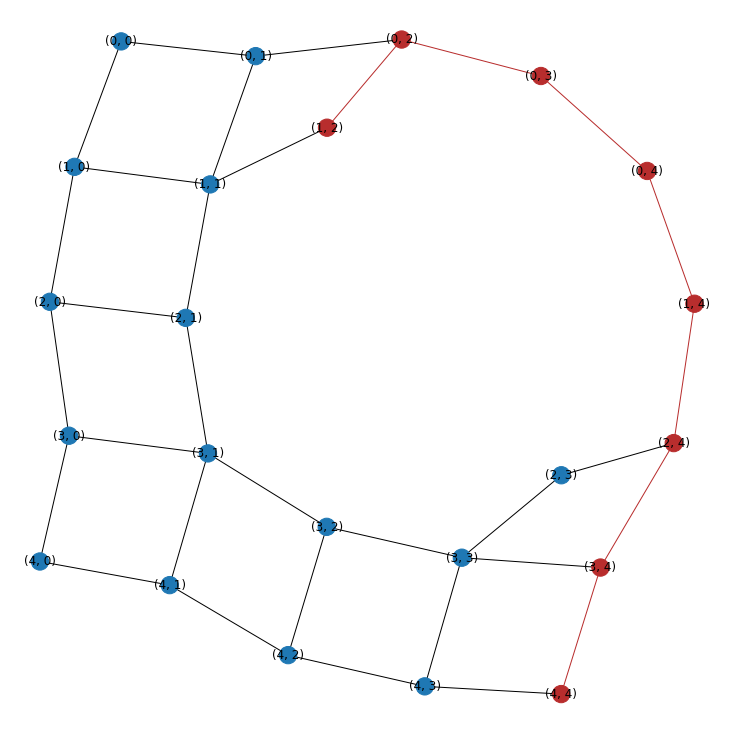

In [61]:
# Skriv koden her

#LF
grid.remove_node((1, 3))
grid.remove_node((2, 2))
# eventuelt grid.remove_nodes_from([(1, 3), (2, 2)])
grid.mark_shortest_path((4, 4), (1, 2))

## Oppgave 1.6
Hvor mange noder må minst slettes for at korteste vei mellom node (4, 4) og (1, 2) skal bli lenger enn den var i oppgave 1.5, men at det fremdeles finnes en vei?

In [62]:
# Kodecelle hvis du vil teste

Hvor mange noder må slettes for at det ikke skal eksistere noen vei mellom node (4, 4) og (1, 2), med utgangspunkt i grafen slik den er i oppgave 1.5?

In [63]:
# Kodecelle hvis du vil teste

## Oppgave 1.7
Opprett et <code>WattsStrogatz</code>-objekt med parametre n=100, k=4 og p=0.1.
Tegn så grafen, og finn korteste vei mellom node 53 og 75.


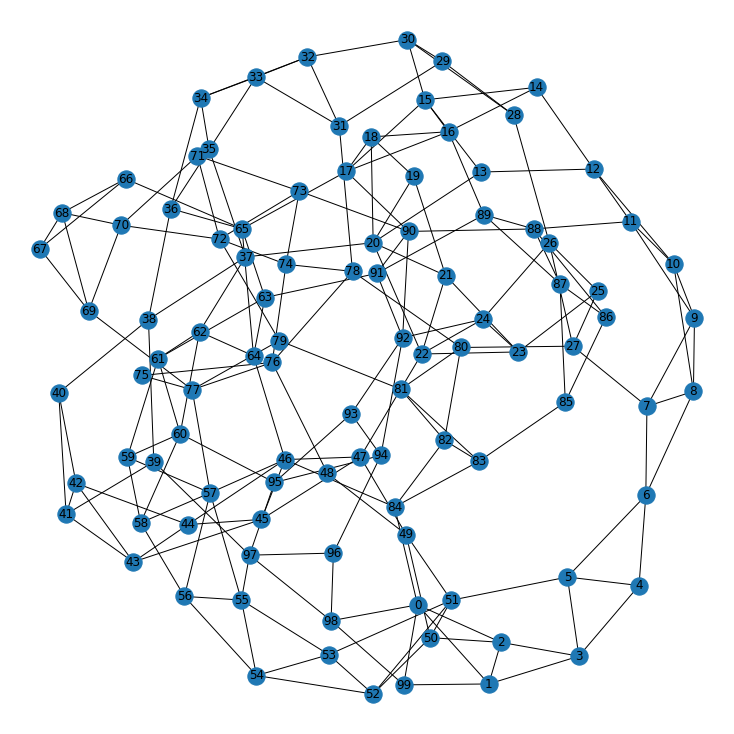

In [64]:
# Skriv koden her
ws = WattsStrogatz(100, 4, 0.1)
ws.draw()

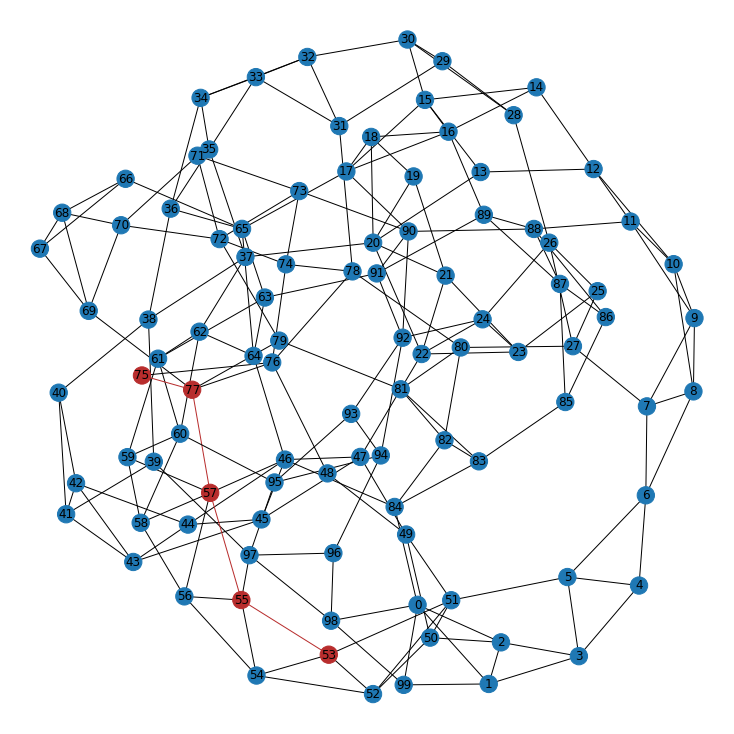

In [65]:
# Skriv koden for korteste vei her
ws.mark_shortest_path(53, 75)